<center><h1>SCI Classification

In [1]:
# import libraries to be used throughout project
import pandas as pd
import numpy as np
import matplotlib 
import math
from matplotlib import pylab as plt
import seaborn as sns

In [6]:
# import sci dataset for analysis
df = pd.read_csv('../data/sci_v_control.csv')
df.drop(['ID'],axis=1,inplace=True)

df.head()

,Group,OH_SBP,OH_DBP,V1_SV_Pre,V1_SV_Post,V1_SV_Diff,V2_SV_Pre,V2_SV_Post,V2_SV_Diff,SBP_BL_1_mean,...,vLF_VAL_2,SBP_HF_VAL_2,SBP_LF_VAL_2,SBP_vLF_VAL_2,alpha_HF_VAL_2,alpha_LF_VAL_2,avg_alpha_VAL_2,RR_VAR_VAL_2,RMSD_VAL_2,IBI_VAL_2
0,SCI,0,0,13.02,37.18,24.16,13.15,34.71,21.56,122.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Control,0,0,12.92,18.87,5.95,13.26,25.36,12.10,105.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SCI,1,5,17.41,34.24,16.83,17.31,33.76,16.45,152.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCI,0,4,10.15,26.85,16.70,12.14,24.52,12.38,110.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SCI,1,4,13.56,29.36,15.80,13.64,23.20,9.56,114.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Exploratory Data Analysis</h2>

  Perform early data analysis to better understand the distribution of the dataset, as well as the target variable. This step will inform our process for splitting and preprocessing the data.
  

In [7]:
print('Number of datapoints in dataset:',df.shape[0])
print('Number of features in dataset:',df.shape[1])

Number of datapoints in dataset: 159
Number of features in dataset: 165


In [28]:
# # list datatypes for each feature
# sum=-1
# with pd.option_context('display.max_rows',None):
#     for i in range(df.shape[1]):
#         if df.dtypes[i] == 'object':
#             print(df.columns[i])
#             sum += 1

# print('\n',sum,'features with missing values')

In [27]:
# list datatypes for each feature
with pd.option_context('display.max_rows',None):
    print(df.dtypes)

Group               object
OH_SBP               int64
OH_DBP               int64
V1_SV_Pre          float64
V1_SV_Post         float64
V1_SV_Diff         float64
V2_SV_Pre          float64
V2_SV_Post         float64
V2_SV_Diff         float64
SBP_BL_1_mean      float64
SBP_BL_1_std       float64
SBP_POS_1_mean     float64
SBP_POS_1_std      float64
SBP_ch_1_mean      float64
SBP_ch_1_std       float64
SBP_BL_2_mean      float64
SBP_BL_2_std       float64
SBP_POS_2_mean     float64
SBP_POS_2_std      float64
SBP_ch_2_mean      float64
SBP_ch_2_std       float64
DBP_BL_1_mean      float64
DBP_BL_1_std       float64
DBP_POS_1_mean     float64
DBP_POS_1_std      float64
DBP_ch_1_mean      float64
DBP_ch_1_std       float64
DBP_BL_2_mean      float64
DBP_BL_2_std       float64
DBP_POS_2_mean     float64
DBP_POS_2_std      float64
DBP_ch_2_mean       object
DBP_ch_2_std        object
HR_BL_1_mean       float64
HR_BL_1_std        float64
HR_POS_1_mean      float64
HR_POS_1_std       float64
H

In [48]:
y = df['Group']

print('Target data type:',y.dtypes)

# Each score is unique (752 total)
y.describe()

Target data type: object


count     159
unique      2
top       SCI
freq      112
Name: Group, dtype: object

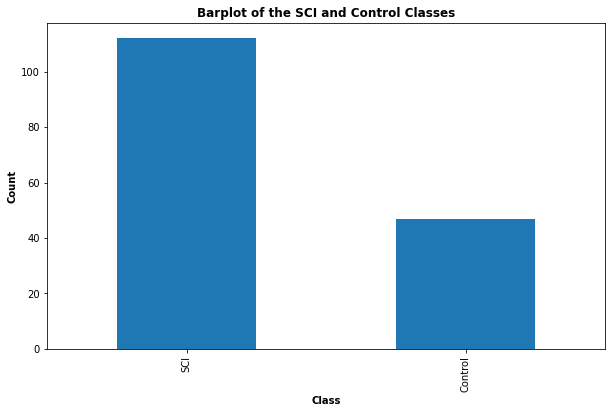

In [65]:
plt.figure(figsize=(10,6))

# create histogram for target 
# y.plot.barh()
y.value_counts().plot.bar()

# label and show 
plt.xlabel('Class', weight='bold')
plt.ylabel('Count',weight='bold')
plt.title('Barplot of the SCI and Control Classes', weight='bold')
plt.savefig(fname='../figures/class_histogram',format='png',dpi=300)
plt.show()

**Barplot of the Target Variable:** The barplot of the target variable shows that the classes are unevenly distributed throughout the dataset, as the SCI group dominates most of the datapoints. From this analysis we observe that a stratified split will be necessary to ensure each dataset (train, test, val) has a proportionate amount of datapoints from each class. 

<h2>Feature Exploration </h2>

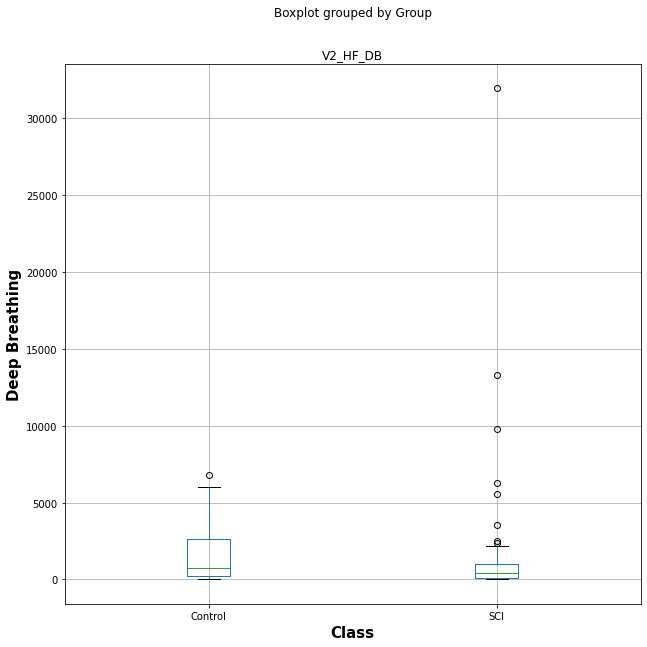

In [84]:
#define plot size for all plots
plt.rcParams['figure.figsize'] = [10, 10]
df[['V2_HF_DB','Group']].boxplot(by='Group')
plt.ylabel('Deep Breathing',weight='bold',fontsize=15)
plt.xlabel('Class',weight='bold',fontsize=15)
plt.show()

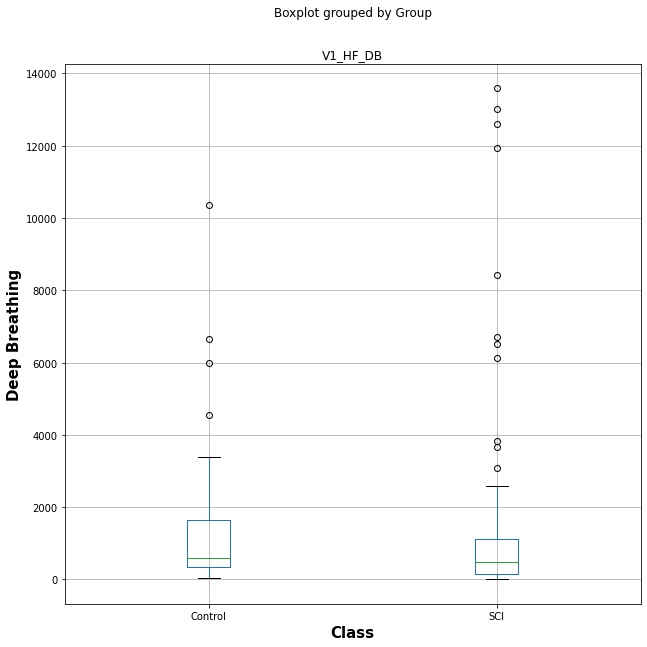

In [89]:
df[['V1_HF_DB','Group']].boxplot(by='Group')
plt.ylabel('Deep Breathing',weight='bold',fontsize=15)
plt.xlabel('Class',weight='bold',fontsize=15)
plt.show()

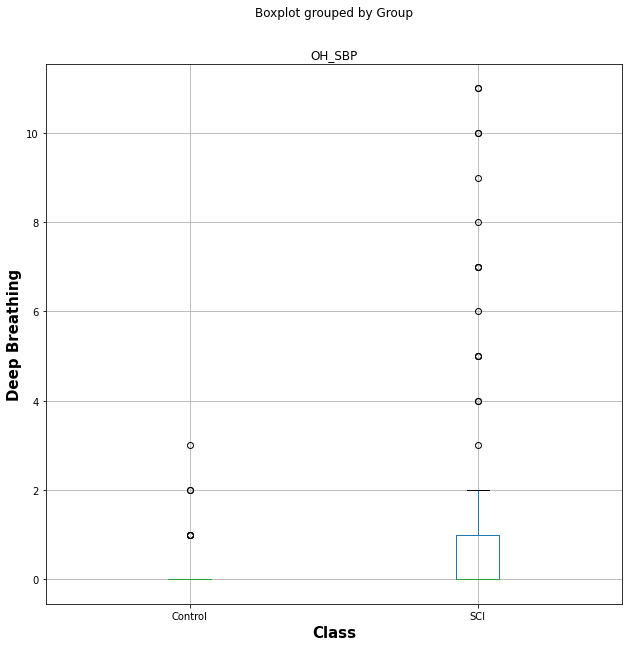

In [93]:
df[['OH_SBP','Group']].boxplot(by='Group')
plt.ylabel('Deep Breathing',weight='bold',fontsize=15)
plt.xlabel('Class',weight='bold',fontsize=15)
plt.show()

<AxesSubplot:xlabel='OH_SBP'>

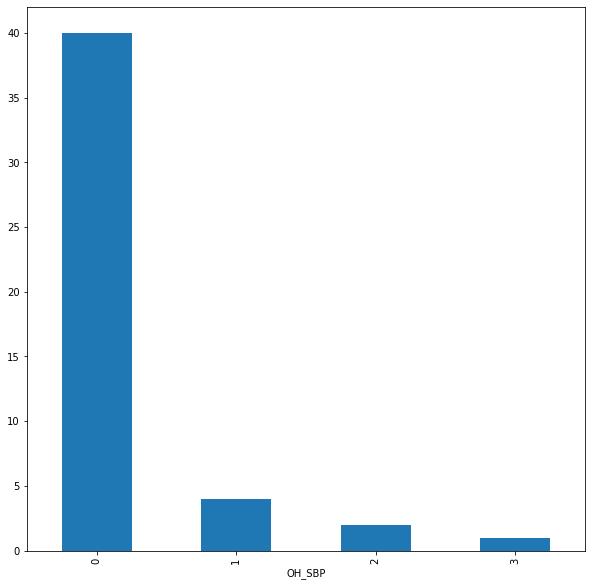

In [105]:
o = df[['Group','OH_SBP']]b
o.value_counts()['Control'].plot.bar()

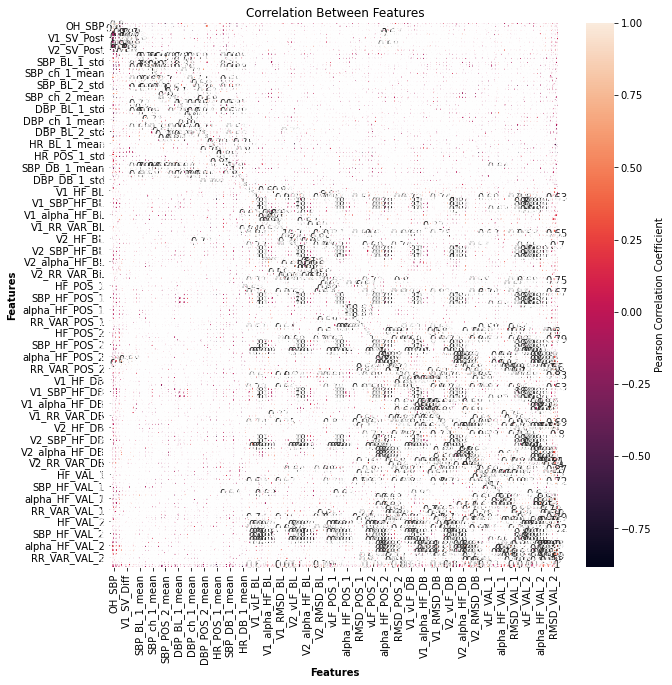

In [106]:
# create correlations between features 
pear_corr = df.corr(method='pearson')
sns.heatmap(pear_corr, annot=True, cbar_kws={'label': 'Pearson Correlation Coefficient'})

# plot
plt.title('Correlation Between Features')
plt.xlabel('Features',weight='bold')
plt.ylabel('Features',weight='bold')
# plt.savefig(fname='../figures/feature_correlation_coefficients',format='png')
plt.show()

In [110]:
for i in range(165):
    print(df.columns[i])

Group
OH_SBP
OH_DBP
V1_SV_Pre
V1_SV_Post
V1_SV_Diff
V2_SV_Pre
V2_SV_Post
V2_SV_Diff
SBP_BL_1_mean
SBP_BL_1_std
SBP_POS_1_mean
SBP_POS_1_std
SBP_ch_1_mean
SBP_ch_1_std
SBP_BL_2_mean
SBP_BL_2_std
SBP_POS_2_mean
SBP_POS_2_std
SBP_ch_2_mean
SBP_ch_2_std
DBP_BL_1_mean
DBP_BL_1_std
DBP_POS_1_mean
DBP_POS_1_std
DBP_ch_1_mean
DBP_ch_1_std
DBP_BL_2_mean
DBP_BL_2_std
DBP_POS_2_mean
DBP_POS_2_std
DBP_ch_2_mean
DBP_ch_2_std
HR_BL_1_mean
HR_BL_1_std
HR_POS_1_mean
HR_POS_1_std
HR_ch_1_mean
HR_ch_1_std
HR_BL_2_mean
HR_BL_2_std
HR_POS_2_mean
HR_POS_2_std
HR_ch_2_mean
HR_ch_2_std
SBP_DB_1_mean
SBP_DB_1_std
SBP_DB_2_mean
SBP_DB_2_std
DBP_DB_1_mean
DBP_DB_1_std
DBP_DB_2_mean
DBP_DB_2_std
HR_DB_1_mean
HR_DB_1_std
HR_DB_2_mean
HR_DB_2_std
SBP_VAL_1_mean
SBP_VAL_1_std
SBP_VAL_2_mean
SBP_VAL_2_std
DBP_VAL_1_mean
DBP_VAL_1_std
DBP_VAL_2_mean
DBP_VAL_2_std
HR_VAL_1_mean
HR_VAL_1_std
HR_VAL_2_mean
HR_VAL_2_std
V1_HF_BL
V1_LF_BL
V1_vLF_BL
V1_SBP_HF_BL
V1_SBP_LF_BL
V1_SBP_vLF_BL
V1_alpha_HF_BL
V1_alpha_LF_BL
V1_a

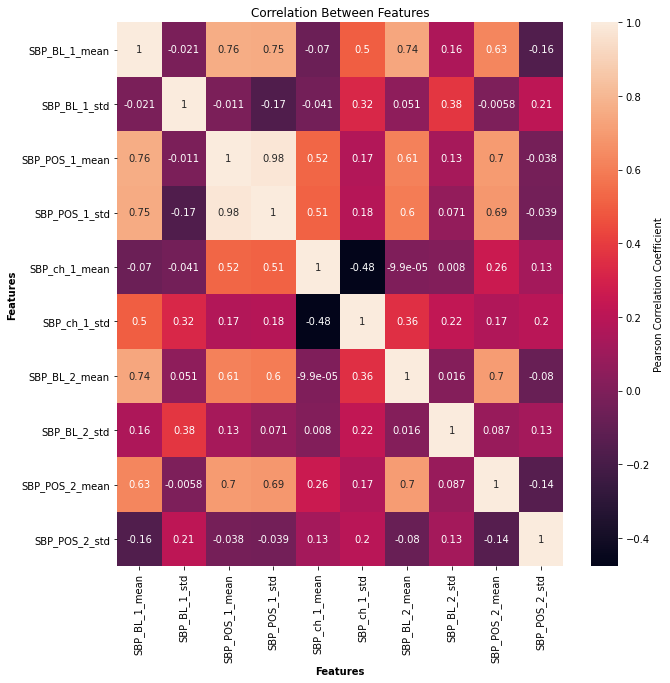

In [124]:
means = df.columns[9:19]

df_means = df[means]
df_means

# create correlations between features 
pear_corr = df_means.corr(method='pearson')
sns.heatmap(pear_corr, annot=True, cbar_kws={'label': 'Pearson Correlation Coefficient'})

# plot
plt.title('Correlation Between Features')
plt.xlabel('Features',weight='bold')
plt.ylabel('Features',weight='bold')
plt.savefig(fname='../figures/feature_correlation_coefficients',format='png')
plt.show()

Text(0, 0.5, 'POS')

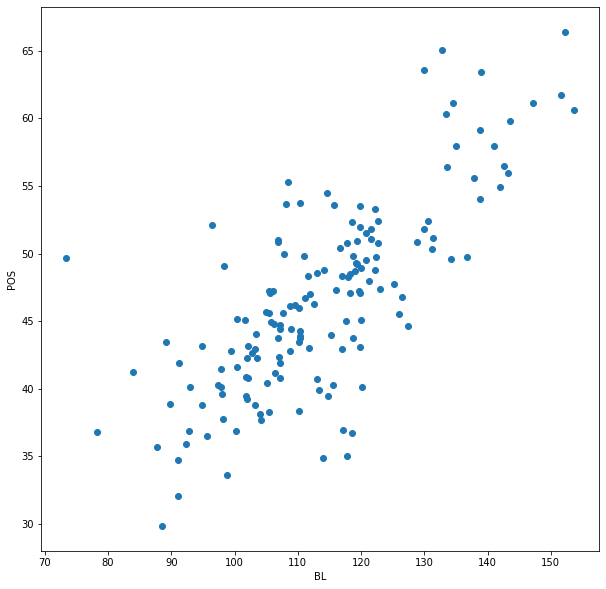

In [119]:
plt.scatter(df['SBP_BL_1_mean'],df['SBP_POS_1_std'])
plt.xlabel('BL')
plt.ylabel('POS')

Text(0, 0.5, 'POS')

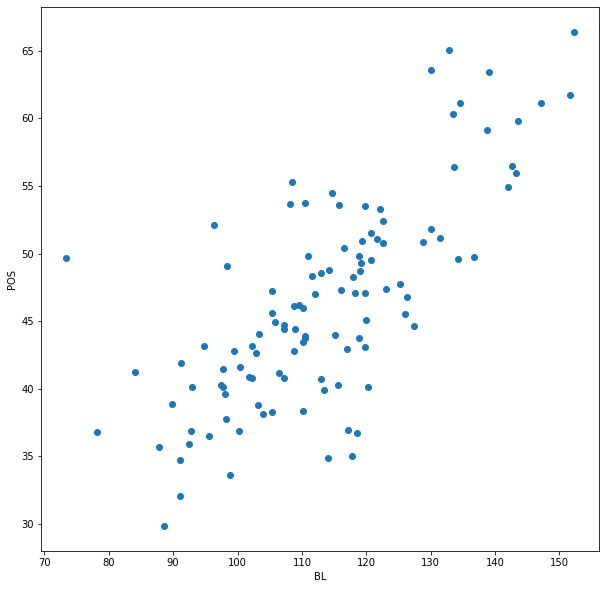

In [123]:
df_sci = df[df['Group']=='SCI']

df_sci

plt.scatter(df_sci['SBP_BL_1_mean'],df_sci['SBP_POS_1_std'])
plt.xlabel('BL')
plt.ylabel('POS')

Text(0, 0.5, 'POS')

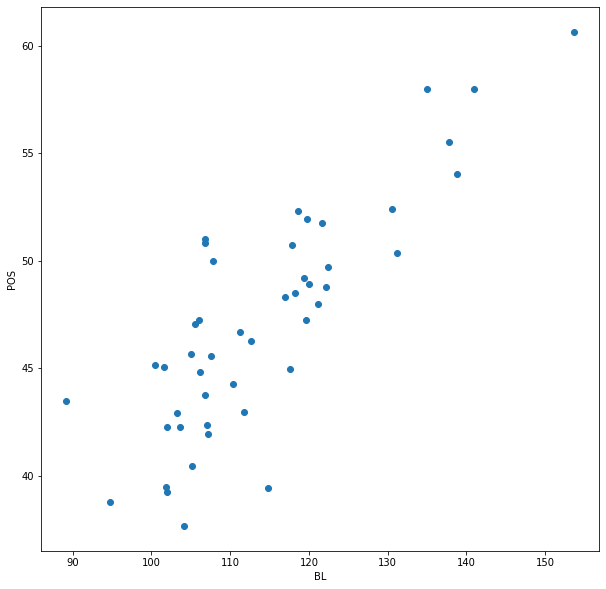

In [125]:
df_control = df[df['Group']=='Control']


plt.scatter(df_control['SBP_BL_1_mean'],df_control['SBP_POS_1_std'])
plt.xlabel('BL')
plt.ylabel('POS')